## gaia/kepler/k2/nexsci cross-matched catalogs

* merge Kepler candidates + parallax + FPP (Morton+2016) tables

In [2]:
import numpy as np
#np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as pl
%matplotlib inline
from astropy.table import Table

In [3]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1. #set the value globally

# Kepler candidates with Gaia parallax

The merged Gaia parallax and Kepler host star data is downloadable from [here](https://www.dropbox.com/s/v070hmvhm2ezjax/kepler_dr2_4arcsec.fits?dl=0).

In [4]:
import getpass
user = getpass.getuser()
datadir='/home/'+user+'/data/gaia/'
kep_data = Table.read(datadir+'kepler_dr2_4arcsec.fits', format='fits')

In [4]:
kep_data[:5]

angDist,kepid,source_id,ra_gaia,ra_error,dec_gaia,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val,tm_designation,ra_kic,dec_kic,kepmag,teff,teff_err1,teff_err2,teff_prov,logg,logg_err1,logg_err2,logg_prov,feh,feh_err1,feh_err2,feh_prov,radius,radius_err1,radius_err2,mass,mass_err1,mass_err2,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,kepoi_name,planet?
arcsec,,,deg,0.001 arcsec,deg,0.001 arcsec,0.001 arcsec,0.001 arcsec,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,ph / s,ph / s,mag,ph / s,ph / s,mag,ph / s,ph / s,mag,mag,km / s,km / s,K,mag,mag,solRad,solLum,,deg,deg,,K,K,K,,,,,,,,,,solRad,solRad,solRad,solMass,solMass,solMass,,,,,mag,mag,mag,,
float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str25,float64,float64,float64,int64,int64,int64,str5,float64,float64,float64,str5,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,str6,int64,int64,int64,float64,float64,float64,str9,str4
0.15616,757076,2050233807328471424,291.038681305,0.0359,36.5980305018,0.0478,1.4939,0.0483,-4.961,0.079,-13.683,0.081,429068.0,130.709,11.607049,196805.0,360.632,12.116295,329938.0,372.998,10.965838,1.150457,-16.28,0.64,4927.0,nan,nan,4.01,8.524,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,171,-156,PHO1,3.58,0.928,-0.232,KIC0,-0.1,0.3,-0.3,KIC0,3.128,0.987,-2.304,1.357,0.204,-0.475,DSEP,0,0,0,10.126,9.667,9.559,N/A,none
0.128262,757099,2050233601176543104,291.043057138,0.0199,36.5937670632,0.0276,2.6782,0.0272,2.88,0.043,-2.667,0.055,108912.0,153.213,13.095681,52403.4,275.227,13.552989,82009.5,312.707,12.47726,1.075729,nan,nan,5281.25,0.4943,0.2473,0.95,0.63,2MASS J19241033+3635377,291.04306,36.593811,13.152,5519,182,-149,PHO1,3.822,0.638,-0.213,KIC0,-0.22,0.35,-0.25,KIC0,2.109,0.673,-1.251,1.077,0.175,-0.233,DSEP,0,0,1,11.656,11.193,11.094,N/A,none
0.146787,757137,2050230543159814656,291.055892008,0.0194,36.559886182,0.0266,1.7234,0.0253,-4.502,0.042,-8.636,0.052,4217640.0,1078.28,9.125692,1765180.0,2398.46,9.734418,3454670.0,3346.22,8.415903,1.318515,-12.41,0.52,4683.52,0.4427,0.2043,12.47,67.381,2MASS J19241341+3633358,291.05588,36.559952,9.196,4706,74,-102,PHO1,2.374,0.03,-0.027,AST9,-0.1,0.2,-0.3,KIC0,15.447,3.54,-3.933,2.061,1.157,-0.947,DSEP,0,0,0,7.467,6.853,6.722,N/A,none
0.116421,757280,2050230611879323904,291.095372808,0.0169,36.5649028283,0.023,1.1837,0.022,-0.668,0.037,-2.782,0.046,367284.0,78.14,11.775861,206782.0,280.407,12.062609,232557.0,135.978,11.345596,0.717012,-17.96,4.93,6224.0,nan,nan,2.74,10.175,2MASS J19242289+3633538,291.0954,36.564941,11.901,6543,162,-194,PHO1,4.082,0.258,-0.172,KIC0,-0.24,0.25,-0.3,KIC0,1.638,0.475,-0.475,1.18,0.209,-0.157,DSEP,0,0,0,10.852,10.662,10.627,N/A,none
0.114502,757450,2050231848829944320,291.137620279,0.0196,36.5773443112,0.0252,1.1689,0.0261,7.99,0.044,-2.449,0.05,15988.4,10.6853,15.17885,7297.41,33.2245,15.693465,12502.6,25.0306,14.519423,1.174043,nan,nan,4993.0,0.653,0.321,0.96,0.511,2MASS J19243302+3634385,291.1376,36.577381,15.264,5332,106,-96,SPE51,4.5,0.05,-0.036,TRA51,-0.08,0.15,-0.15,SPE51,0.843,0.045,-0.045,0.821,0.061,-0.04,DSEP,1,1,1,13.665,13.262,13.118,K00889.01,conf


convert table to pandas

In [5]:
df1 = kep_data.to_pandas()
df1.head()

,angDist,kepid,source_id,ra_gaia,ra_error,dec_gaia,dec_error,parallax,parallax_error,pmra,...,mass_err2,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,kepoi_name,planet?
0,0.156160,757076.0,2.050234e+18,291.038681,0.0359,36.598031,0.0478,1.4939,0.0483,-4.961,...,-0.475,DSEP,0.0,0.0,0.0,10.126,9.667,9.559,N/A,none
1,0.128262,757099.0,2.050234e+18,291.043057,0.0199,36.593767,0.0276,2.6782,0.0272,2.880,...,-0.233,DSEP,0.0,0.0,1.0,11.656,11.193,11.094,N/A,none
2,0.146787,757137.0,2.050231e+18,291.055892,0.0194,36.559886,0.0266,1.7234,0.0253,-4.502,...,-0.947,DSEP,0.0,0.0,0.0,7.467,6.853,6.722,N/A,none
3,0.116421,757280.0,2.050231e+18,291.095373,0.0169,36.564903,0.0230,1.1837,0.0220,-0.668,...,-0.157,DSEP,0.0,0.0,0.0,10.852,10.662,10.627,N/A,none
4,0.114502,757450.0,2.050232e+18,291.137620,0.0196,36.577344,0.0252,1.1689,0.0261,7.990,...,-0.040,DSEP,1.0,1.0,1.0,13.665,13.262,13.118,K00889.01,conf


In [6]:
df1.shape

(241989, 61)

In [7]:
np.unique(kep_data['planet?'])

cand
conf
none


In [8]:
df1['KOI'] = df1['kepoi_name'].astype('str').apply(lambda x: x[2:])

## Morton+2016 FPP

* fetch [Table 6](http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/ApJ/822/86) of Morton+2016 using [astropy.astroquery.Vizier](http://astroquery.readthedocs.io/en/latest/vizier/vizier.html)

In [9]:
from astroquery.vizier import Vizier

Vizier.ROW_LIMIT = -1
catalog_list = Vizier.find_catalogs('False positive probabilities for Q1-Q17 DR24 KOIs Morton 2016')
print({k:v.description for k,v in catalog_list.items()})

{'J/ApJ/822/86': 'False positive probabilities for Q1-Q17 DR24 KOIs (Morton+, 2016)'}


In [10]:
catalogs = Vizier.get_catalogs(catalog_list.keys())

In [11]:
print(catalogs)

TableList with 3 tables:
	'0:J/ApJ/822/86/table3' with 12 column(s) and 9 row(s) 
	'1:J/ApJ/822/86/table5' with 17 column(s) and 6102 row(s) 
	'2:J/ApJ/822/86/table6' with 15 column(s) and 7470 row(s) 


In [12]:
fpp = catalogs[2]
fpp[:5]

KOI,HZ,Per,dsec,PrEB,PrEB2,PrHEB,PrHEB2,PrBEB,PrBEB2,Prboxy,Prlong,fp,FPP,e_FPP
,,d,ppm,,,,,,,,,,,
float32,bytes1,float32,int32,float32,float32,float32,float32,float32,float32,float32,bytes7,float32,float32,float32
1.01,,2.471,20,0.0049999999,0.001,0.00030000001,3.9999999e-05,0.0,0.0,0.0,0.0e+00,0.074,0.0060000001,0.00079999998
2.01,,2.205,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0e+00,0.057,0.0,0.0
3.01,,4.888,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0e+00,--,0.0,2e-06
4.01,,3.849,66,0.0099999998,0.00030000001,0.0070000002,9.9999997e-06,0.00060000003,0.0,0.0,0.0e+00,0.069,0.02,0.0049999999
5.01,,4.780,15,0.2,0.003,0.029999999,4.9999999e-05,3.9999999e-05,0.0,0.0,0.0e+00,0.052,0.2,0.2


convert table to pandas, then fix the format of KOI column

In [13]:
df2 = fpp.to_pandas()
df2['KOI'] = df2['KOI'].astype('str').apply(lambda x: x.zfill(7))
df2.head()

,KOI,HZ,Per,dsec,PrEB,PrEB2,PrHEB,PrHEB2,PrBEB,PrBEB2,Prboxy,Prlong,fp,FPP,e_FPP
0,0001.01,b'',2.471,20.0,0.005,0.0010,0.0003,0.00004,0.00000,0.0,0.0,b'0.0e+00',0.074,0.006,0.000800
1,0002.01,b'',2.205,96.0,0.000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,b'0.0e+00',0.057,0.000,0.000000
2,0003.01,b'',4.888,11.0,0.000,0.0000,0.0000,0.00000,0.00000,0.0,0.0,b'0.0e+00',NaN,0.000,0.000002
3,0004.01,b'',3.849,66.0,0.010,0.0003,0.0070,0.00001,0.00060,0.0,0.0,b'0.0e+00',0.069,0.020,0.005000
4,0005.01,b'',4.780,15.0,0.200,0.0030,0.0300,0.00005,0.00004,0.0,0.0,b'0.0e+00',0.052,0.200,0.200000


## NExSci 

* fetch Kepler candidate planet properties from [nexsci](https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html).

In [14]:
import pandas as pd

refresh = False

fname = '~/data/q1_q17_dr25_koi.csv'
if refresh:
    koi_link='http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=q1_q17_dr25_koi&select=*'
    koi = pd.read_csv(koi_link)
    koi.to_csv(fname)
else:
    koi = pd.read_csv(fname,index_col=0)

In [15]:
koi.tail()

,kepid,kepoi_name,kepler_name,ra,ra_err,ra_str,dec,dec_err,dec_str,koi_gmag,...,koi_fpflag_co,koi_fpflag_ec,koi_insol,koi_insol_err1,koi_insol_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_score
8049,9530945,K00708.01,Kepler-216 c,293.72806,0.0,19h34m54.73s,46.129150,0.0,+46d07m44.9s,14.372,...,0,0,104.04,51.40,-36.02,0.48517,0.00391,-0.12441,LS+MCMC,1.000
8050,9530945,K00708.02,Kepler-216 b,293.72806,0.0,19h34m54.73s,46.129150,0.0,+46d07m44.9s,14.372,...,0,0,308.61,152.48,-106.84,0.43582,0.11411,-0.11699,LS+MCMC,1.000
8051,9578686,K00709.01,Kepler-651 b,287.33279,0.0,19h09m19.87s,46.203510,0.0,+46d12m12.6s,14.460,...,0,0,25.63,6.91,-5.12,1.82855,1.00319,-0.05226,LS+MCMC,1.000
8052,6678383,K00111.01,Kepler-104 b,287.60461,0.0,19h10m25.11s,42.166779,0.0,+42d10m00.4s,12.956,...,0,0,124.31,48.42,-34.01,0.54640,0.42632,-0.06106,LS+MCMC,0.999
8053,5613330,K00649.01,Kepler-635 b,289.77325,0.0,19h19m05.58s,40.800720,0.0,+40d48m02.6s,13.666,...,0,0,97.94,49.00,-33.09,0.30321,0.01485,-0.11063,LS+MCMC,1.000


Note the difference between `koi_disposition` and `koi_pdisposition` as discussed [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).

`koi_pdisposition` means project disposition. The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE. The value of this flag may change over time as the evaluation of KOIs proceeds to deeper levels of analysis using Kepler time-series pixel and light curve data, or follow-up observations. 

whereas,
`koi_disposition` is the category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED. All KOIs marked as CONFIRMED are also listed in the Exoplanet Archive Confirmed Planet table. Designations of CANDIDATE, FALSE POSITIVE, and NOT DISPOSITIONED are taken from the Disposition Using Kepler Data.

In [16]:
np.unique(koi['koi_disposition'])

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [17]:
np.unique(koi['koi_pdisposition'])

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [18]:
#get only candidates
mask = koi['koi_pdisposition'] == 'CANDIDATE' #| (koi['koi_disposition'] == 'CONFIRMED')
df3 = koi[mask]
df3.shape

(4034, 153)

In [19]:
#convert to str and fix KOI column similar to df2
df3['KOI'] = df3['kepoi_name'].astype('str').apply(lambda x: x[2:])
df3.tail()

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,kepid,kepoi_name,kepler_name,ra,ra_err,ra_str,dec,dec_err,dec_str,koi_gmag,...,koi_fpflag_ec,koi_insol,koi_insol_err1,koi_insol_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_score,KOI
8049,9530945,K00708.01,Kepler-216 c,293.72806,0.0,19h34m54.73s,46.129150,0.0,+46d07m44.9s,14.372,...,0,104.04,51.40,-36.02,0.48517,0.00391,-0.12441,LS+MCMC,1.000,0708.01
8050,9530945,K00708.02,Kepler-216 b,293.72806,0.0,19h34m54.73s,46.129150,0.0,+46d07m44.9s,14.372,...,0,308.61,152.48,-106.84,0.43582,0.11411,-0.11699,LS+MCMC,1.000,0708.02
8051,9578686,K00709.01,Kepler-651 b,287.33279,0.0,19h09m19.87s,46.203510,0.0,+46d12m12.6s,14.460,...,0,25.63,6.91,-5.12,1.82855,1.00319,-0.05226,LS+MCMC,1.000,0709.01
8052,6678383,K00111.01,Kepler-104 b,287.60461,0.0,19h10m25.11s,42.166779,0.0,+42d10m00.4s,12.956,...,0,124.31,48.42,-34.01,0.54640,0.42632,-0.06106,LS+MCMC,0.999,0111.01
8053,5613330,K00649.01,Kepler-635 b,289.77325,0.0,19h19m05.58s,40.800720,0.0,+40d48m02.6s,13.666,...,0,97.94,49.00,-33.09,0.30321,0.01485,-0.11063,LS+MCMC,1.000,0649.01


## Merging tables
* use key='KOI'
* see koi column meanings [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)

Merge the 'outer'=union of KOI columns of df2 and df3

In [20]:
df23 = pd.merge(df2, df3, how='outer', on='KOI')
df23.shape

(7754, 168)

Merge the 'inner'=intersection of kepid columns of df1 and df23

In [21]:
df_all = pd.merge(df1, df23, how='inner', on='kepid')
df_all.shape

(4933, 229)

## Adding constraints

Kepler confirmed+candidates
* without planet mass measurement, 
* bright (Mv<14), 
* low FPP (fpp<0.5)
* large depth (d>1mmag), 
* large expected K>1m/s, 
* period < 50 d
* t23/t14 > 0.5

In [22]:
mask.shape

(8054,)

In [23]:
df_all['FPP'].dropna().shape

(4527,)

In [24]:
df_all['FPP'].shape

(4933,)

In [25]:
low_fpp = df_all['FPP'] < 0.5

df_all = df_all[mask]
df_all.shape

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(2945, 229)

In [26]:
#cand = df_all['koi_disposition'] != 'CONFIRMED'
cand = df_all['planet?'] != 'conf'
idx = low_fpp & cand
df_all[idx].shape

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(839, 229)

In [27]:
df_all[df_all['planet?'] == 'conf'].shape

(1718, 229)

In [28]:
bright = df_all['koi_kepmag'] < 12
idx = low_fpp & cand & bright

In [304]:
from astropy import units as u
from astropy import constants as c

def inclination(a, b, e=None, w=None):
    """
    Winn 2014 ("Transits and Occultations"), eq. 7
    """
    # if e is None and w is None:
    #     return np.arccos(b / a)
    # elif e is not None and w is not None:
    #     return np.arccos(b / a * (1 + e * np.sin(w)) / (1 - e**2))
    # else:
    #     return np.nan
    return np.arccos(b / a)

def t14_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 14
    """
    i = inclination(a, b)
    alpha = np.sqrt( (1 + k)**2 - b**2 )
    return (p / np.pi) * np.arcsin( alpha / np.sin(i) / a )


def t23_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 15
    """
    i = inclination(a, b)
    alpha = np.sqrt( (1 - k)**2 - b**2 )
    return (p / np.pi) * np.arcsin( alpha / np.sin(i) / a )


def tau_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 18
    """
    return p / np.pi / a * k / np.sqrt(1 - b**2)


def tshape_approx(a, k, b):
    """
    Seager & Mallen-Ornelas 2003, eq. 15
    """
    i = inclination(a, b)
    alpha = (1 - k)**2 - b**2
    beta = (1 + k)**2 - b**2
    return np.sqrt( alpha / beta )


def max_k(tshape):
    """
    Seager & Mallen-Ornelas 2003, eq. 21
    """
    return (1 - tshape) / (1 + tshape)

def rho_star(logg, r):
    r = (r * u.R_sun).cgs
    g = 10 ** logg * u.cm / u.s ** 2
    rho = 3 * g / (r * c.G.cgs * 4 * np.pi)
    return rho

In [358]:
from uncertainties import unumpy

G, Msun, Mearth = 6.67e-11, 1.98849925145e30, 6.04589804468e24
Rsun, Rearth, AU, pc = 695500e3, 6371e3, 1.495978707e11, 3.08567758149137e16
kb, mproton = 1.38e-23, 1.67e-27

# Define conversion functions
def days2sec(t):
    return t*24.*60*60
def sec2days(t):
    return t/(24.*60*60)
def days2yrs(t):
    return t/365.25
def yrs2days(t):
    return t*365.25
def Msun2kg(m):
    return m*Msun
def kg2Msun(m):
    return m/Msun
def Mearth2kg(m):
    return m*Mearth
def kg2Mearth(m):
    return m/Mearth
def Rearth2m(r):
    return r*Rearth
def m2Rearth(r):
    return r/Rearth
def Rsun2m(r):
    return r*Rsun
def m2Rsun(r):
    return r/Rsun
def AU2m(r):
    return r*AU
def m2AU(r):
    return r/AU
def pc2m(r):
    return r*pc
def m2pc(r):
    return r/pc

def RV_K(P_days, Ms_Msun, mp_Mearth, ecc=0., inc_deg=90.):
    '''Compute the RV semiamplitude in m/s.'''
    P, Ms, mp, inc = days2sec(P_days), Msun2kg(Ms_Msun), Mearth2kg(mp_Mearth), \
                     np.deg2rad(inc_deg)
    return (2*np.pi*G/(P*Ms*Ms))**(1./3) * mp*np.sin(inc) / \
        unumpy.sqrt(1-ecc**2)

def transmission_spectroscopy_depth(Rs_Rsun, mp_Mearth, rp_Rearth, Teq, mu,
                                    Nscaleheights=5):
    '''Compute the expected signal in transit spectroscopy in ppm assuming
    the signal is seen at 5 scale heights.'''
    g = 10**logg_model(mp_Mearth, rp_Rearth) * 1e-2
    rp = Rearth2m(rp_Rearth)
    D = (rp / Rsun2m(Rs_Rsun))**2
    H = kb*Teq / (mu*mproton*g)
    return Nscaleheights * 2e6 * D * H / rp


def stellar_density(P_days, T_days, Rs_Rsun, rp_Rearth, b):
    '''Compute the stellar density in units of the solar density (1.41 g/cm3)
    from the transit parameters.'''
    rp, Rs, T, P = Rearth2m(rp_Rearth), Rsun2m(Rs_Rsun), days2sec(T_days), \
                   days2sec(P_days)
    D = (rp / Rs)**2
    rho = 4*np.pi**2 / (P*P*G) * (((1+np.sqrt(D))**2 - \
                                   b*b*(1-np.sin(np.pi*T/P)**2)) / \
                                  (np.sin(np.pi*T/P)**2))**(1.5)  # kg/m3
    rhoSun = 3*Msun2kg(1) / (4*np.pi*Rsun2m(1)**3)
    return rho  / rhoSun

In [305]:
k = df_all['koi_ror']
a = df_all['koi_dor']
b = df_all['koi_impact']
p = df_all['koi_period']
rad = df_all['radius']    #stellar radius in Rsun
logg  = df_all['logg']     #stellar in cgs?
prad  = df_all['koi_prad'] #Earth_radius
pmass = 

inc = df_all['koi_incl']
ecc = df_all['koi_eccen']

df_all['t23_hr'] = t23_circ(p, a, k, b)*24

for lg,r in zip(logg,rad):
    rho = rho_star(logg, r)
    
df_all['rho_star'] = rho

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


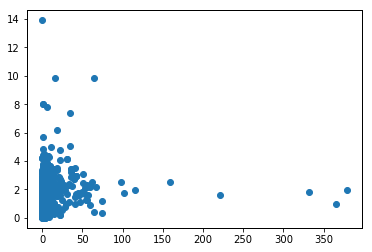

In [340]:
pl.scatter(df_all['koi_srho'],df_all['rho_star']) #[g/cm**3]

In [306]:
df_all['shape'] = df_all['t23_hr']/df_all['koi_duration']

In [310]:
low_fpp = df_all['FPP'] < 0.5
cand    = df_all['planet?'] != 'conf'
bright  = df_all['koi_kepmag'] < 12
boxy    = df_all['shape'] > 0.5
long_period = df_all['koi_period'] < 50
nearby = df_all['parallax'] > 0.5

idx = low_fpp & cand & bright & boxy & long_period & nearby

selected = df_all[idx]
selected.shape

(22, 232)

In [311]:
#etimated planet radius= sub-Saturn?
np.sqrt(2125*1e-6)*110

5.0707494515110882

In [312]:
selected[['kepid','kepoi_name_y','koi_depth','shape','radius','FPP','parallax','koi_period','koi_impact']].sort_values(by='koi_depth')

,kepid,kepoi_name_y,koi_depth,shape,radius,FPP,parallax,koi_period,koi_impact
684,4735826.0,K03184.03,18.5,0.989836,1.376,0.00030,3.4515,4.020189,0.505
683,4735826.0,K03184.01,22.2,0.985192,1.376,0.00300,3.4515,7.545922,0.625
3853,10155029.0,K03208.01,32.2,0.989781,0.997,0.03000,3.3180,2.131661,0.036
1275,5905822.0,K02801.01,33.4,0.884700,1.467,0.00002,3.8185,6.992050,0.944
1333,5985713.0,K03190.01,44.0,0.972792,1.207,0.30000,2.4193,8.952940,0.718
1334,5985713.0,K03190.01,44.0,0.972792,1.207,0.30000,0.7113,8.952940,0.718
2365,7887791.0,K01964.01,49.1,0.986240,0.865,0.10000,7.3529,2.229326,0.249
1534,6356692.0,K02948.01,51.0,0.947097,1.249,0.04000,2.4532,11.391695,0.849
2022,7202957.0,K02687.01,59.5,0.970147,0.902,0.00070,8.8187,1.716828,0.700
2571,8176564.0,K02720.01,65.7,0.963436,1.432,0.03000,4.6493,6.571594,0.751


## Lightcurves

In [36]:
kois = selected['kepoi_name_y'].apply(lambda x: x[2:]).astype(float)
kois

424        4.01
425        4.01
568     1619.01
683     3184.01
684     3184.03
722      367.01
817     2462.01
857     5129.01
1060    1962.01
1275    2801.01
1333    3190.01
1334    3190.01
1534    2948.01
2022    2687.01
2023    2687.02
2237     269.01
2277    2324.01
2278    2324.01
2365    1964.01
2571    2720.01
2705    4399.01
2769    3197.01
3510    2706.01
3853    3208.01
Name: kepoi_name_y, dtype: float64

In [38]:
import kplr
client = kplr.API()

koi = client.koi(367.01)
lcs=koi.get_light_curves(short_cadence=False)
lcs[0].open().info()

Filename: /home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2009131105131_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   476R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (8, 10)   int32   


In [39]:
hdr=lcs[0].open()[1].header
hdr[-25:]

SCFXDOFF=               219400 / short cadence fixed offset                     
CDPP3_0 =   25.557697296142578 / [ppm] RMS CDPP on 3.0-hr time scales           
CDPP6_0 =   22.964338302612305 / [ppm] RMS CDPP on 6.0-hr time scales           
CDPP12_0=    21.89278793334961 / [ppm] RMS CDPP on 12.0-hr time scales          
CROWDSAP=               1.0000 / Ratio of target flux to total flux in op. ap.  
FLFRCSAP=               0.9606 / Frac. of target flux w/in the op. aperture     
NSPSDDET=                    0 / Number of SPSDs detected                       
NSPSDCOR=                    0 / Number of SPSDs corrected                      
PDCVAR  =   1.0131021738052368 / Target variability                             
PDCMETHD= 'regularMap'         / PDC algorithm used for target                  
NUMBAND =                    1 / Number of scale bands                          
FITTYPE1= 'prior   '           / Fit type used for band 1                       
PR_GOOD1=   0.98540431261062

In [40]:
cols = 'CDPP3_0,CDPP6_0,CDPP12_0,PDCVAR,PDC_NOI'.split(',')
for i in cols:
    print(hdr[i])

25.557697296142578
22.964338302612305
21.89278793334961
1.0131021738052368
0.9851270914077759


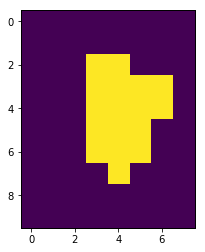

In [41]:
pl.imshow(lcs[0].open()[2].data)

In [42]:
# Find the target KOI.
koi = client.koi(367.01)

# Get a list of light curve datasets.
lcs = koi.get_light_curves(short_cadence=False)

# Loop over the datasets and read in the data.
times, fluxes, ferrs, qualities = [], [], [], []
aper_shapes, apers, headers = [], [], []

for lc in lcs:
    print(lc.filename)
    with lc.open() as f:
        # header of lightcurve data is in 1st FITS HDU
        hdr = f[1].header
        headers.append(hdr)
        
        # lightcurve data
        hdu_data = f[1].data
        times.append(hdu_data["time"])
        fluxes.append(hdu_data["sap_flux"])
        ferrs.append(hdu_data["sap_flux_err"])
        qualities.append(hdu_data["sap_quality"])
        
        # aperture
        aperture = f[2].data
        apers.append(aperture)
        aper_shapes.append(aperture.shape)

/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2009131105131_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2009166043257_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2009259160929_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2009350155506_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2010078095331_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2010265121752_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2010355172524_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2011073133259_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2011271113734_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2012004120508_llc.fits
/home/prometheus/.kplr/data/lightcurves/004815520/kplr004815520-2012088054726_llc.fits
/home/prometheus/.kplr/data/lightcurves/004

In [43]:
def plot_aper(apers,ncols=3,figsize=(15,25)):
    nrows = int(len(apers)/ncols)+1
    fig, ax = pl.subplots(nrows, ncols, figsize=figsize)
    for n in range(len(apers)):
        title = 'aperture={}'.format(apers[n].shape)
        if ncols == 1:
            ax[n].imshow(apers[n])
            ax[n].set_title()
        else:
            ax[int(n/ncols),n%ncols].imshow(apers[n])
            ax[int(n/ncols),n%ncols].set_title(title)

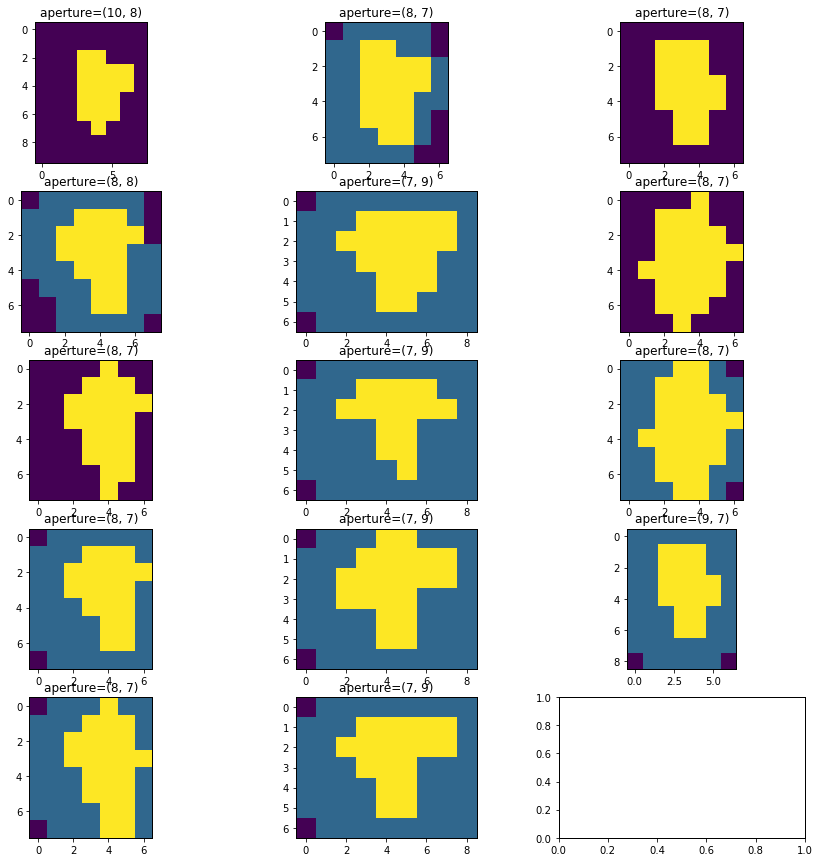

In [44]:
plot_aper(apers,figsize=(15,15))

In [71]:
def plot_lc(times,fluxes,headers,aper_shapes,ncols=3,figsize=(15,25)):
    nrows = int(len(times)/ncols)+1
    fig, ax = pl.subplots(nrows, ncols, figsize=figsize)
    for n in range(len(times)):
        x = times[n]
        y = fluxes[n]
        hdr = headers[n]
        title = 'aperture={0}, noise metric={1:.2f}'.format(aper_shapes[n],hdr['PDC_NOI'])
        if ncols == 1:
            ax[n].plot(x,y)
            ax[n].set_title()
        else:
            ax[int(n/ncols),n%ncols].plot(x,y)
            ax[int(n/ncols),n%ncols].set_title(title)

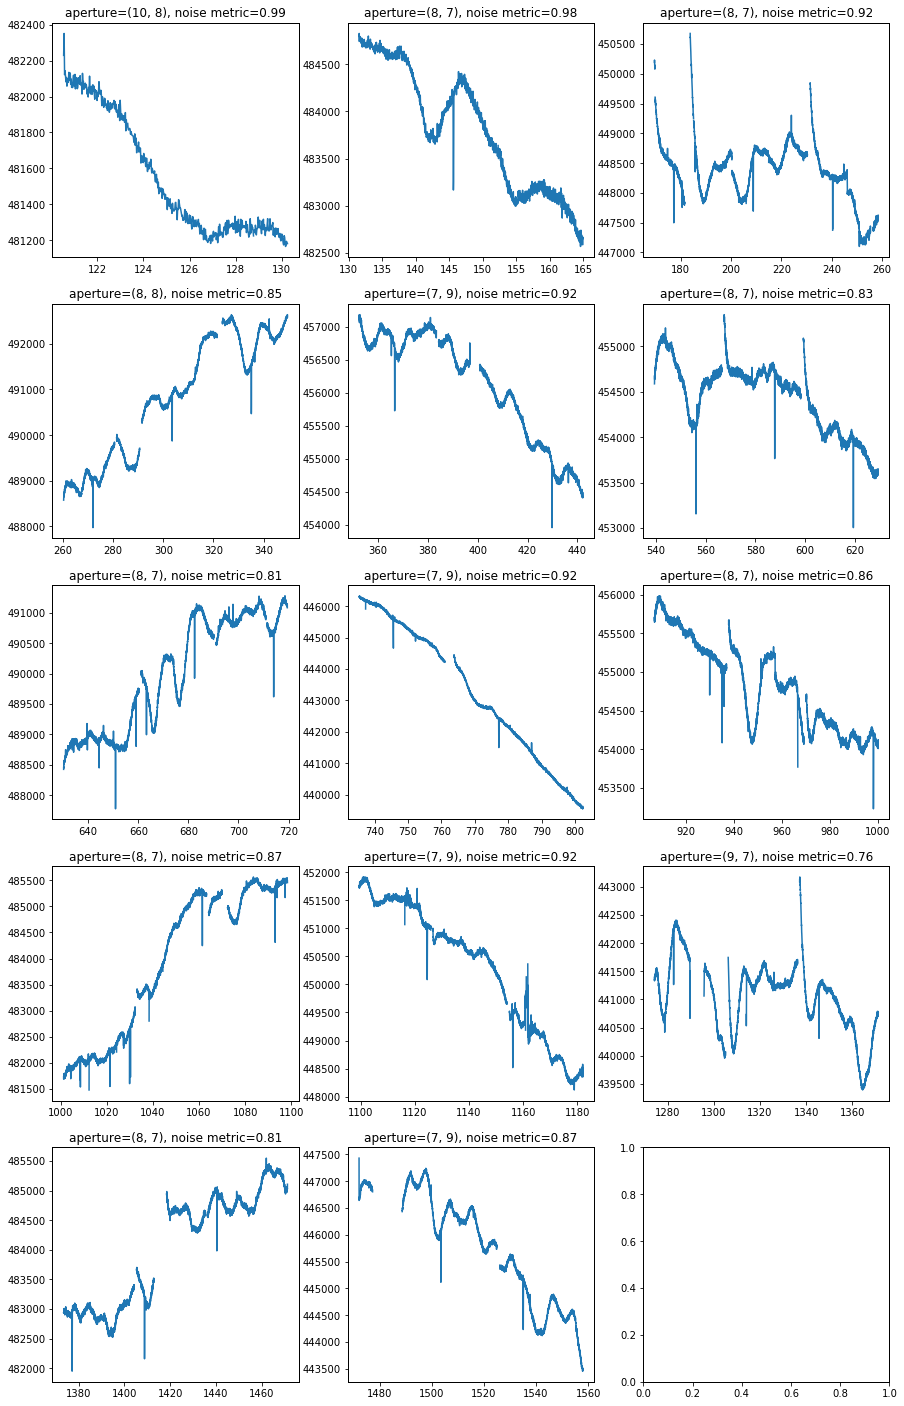

In [72]:
plot_lc(times,fluxes,headers,aper_shapes)

In [68]:
def get_best_lc(koi_num):
    metrics = []
    
    client = kplr.API()
    koi = client.koi(koi_num)
    lcs=koi.get_light_curves(short_cadence=False)
    for lc in lcs:
        hdul=lc.open()
        hdr=hdul[1].header
        metrics.append(hdr['PDC_NOI'])
    return np.argmin(metrics)

In [69]:
get_best_lc(367.01)

11

In [240]:
from tqdm import tqdm

for k in tqdm(koi):
    print('koi {}'.format(koi))
    #idx = get_best_lc(koi)
    koi = client.koi(k)

    # Get a list of light curve datasets.
    lcs = koi.get_light_curves(short_cadence=False,fetch=False)

    # Loop over the datasets and read in the data.
    times, fluxes, ferrs, qualities = [], [], [], []
    aper_shapes, apers, headers = [], [], []

    for lc in lcs:
        print(lc.filename)
        with lc.open() as f:
            # header of lightcurve data is in 1st FITS HDU
            hdr = f[1].header
            headers.append(hdr)

            # lightcurve data
            hdu_data = f[1].data
            times.append(hdu_data["time"])
            fluxes.append(hdu_data["sap_flux"])
            ferrs.append(hdu_data["sap_flux_err"])
            qualities.append(hdu_data["sap_quality"])

            # aperture
            aperture = f[2].data
            apers.append(aperture)
            aper_shapes.append(aperture.shape)

4.01
4.01
1619.01
3184.01
3184.03
367.01
2462.01
5129.01
1962.01
2801.01
3190.01
3190.01
2948.01
2687.01
2687.02
269.01
2324.01
2324.01
1964.01
2720.01
4399.01
3197.01
2706.01
3208.01


## CKS Catalog 

* [CKS data](https://california-planet-search.github.io/cks-website/) and meanings [here](http://www.astro.caltech.edu/~howard/cks/column-definitions.txt)

In [314]:
df4 = pd.read_csv('../data/cks_physical_merged.csv',index_col=0)
df4.shape

(2025, 120)

In [76]:
df4.head()

,id_starname,id_kic,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0,koi_time0_err1,...,iso_prad_err2,iso_sma,iso_sma_err1,iso_sma_err2,iso_insol,iso_insol_err1,iso_insol_err2,iso_teq,iso_teq_err1,iso_teq_err2
0,K00001,11446443,K00001.01,Kepler-1 b,CONFIRMED,2.470613,1.900000e-08,-1.900000e-08,2454955.763,0.000006,...,-1.419266,0.035951,0.000596,-0.000596,890.712853,184.876216,-184.876216,1392.188224,71.758330,-71.758330
1,K00002,10666592,K00002.01,Kepler-2 b,CONFIRMED,2.204735,3.800000e-08,-3.800000e-08,2454954.359,0.000014,...,-2.018515,0.036880,0.000727,-0.000727,3029.593093,931.186264,-931.186264,1890.643307,146.140168,-146.140168
2,K00003,10748390,K00003.01,Kepler-3 b,CONFIRMED,4.887803,1.770000e-07,-1.770000e-07,2454957.813,0.000028,...,-0.410257,0.052952,0.000883,-0.000883,116.907786,20.094411,-20.094411,837.962116,35.981752,-35.981752
3,K00006,3248033,K00006.01,NaN,FALSE POSITIVE,1.334104,7.070000e-07,-7.070000e-07,2454966.702,0.000420,...,-21.966014,0.025383,0.000427,-0.000427,3595.445148,694.155894,-694.155894,1973.338972,95.179897,-95.179897
4,K00007,11853905,K00007.01,Kepler-4 b,CONFIRMED,3.213669,1.122000e-06,-1.122000e-06,2454956.612,0.000280,...,-0.596032,0.044247,0.001075,-0.001075,1233.844672,367.335736,-367.335736,1510.353647,112.889880,-112.889880


In [317]:
df4['id_koicand'].head()

0    K00001.01
1    K00002.01
2    K00003.01
3    K00006.01
4    K00007.01
Name: id_koicand, dtype: object

In [318]:
df_all['kepoi_name_y'].head()

2    K00984.01
3    K00984.01
4    K00994.01
5    K00992.01
6    K00992.02
Name: kepoi_name_y, dtype: object

In [319]:
df=pd.merge(df4,df_all,how='outer',left_on='id_koicand',right_on='kepoi_name_y')
df.shape

(3888, 352)

In [320]:
low_fpp = df['FPP'] < 0.5
cand    = df['planet?'] != 'conf'
bright  = df['koi_kepmag'] < 14
short_period = df['koi_period_y'] < 40
deep    = df['koi_depth_y'] > 1000
nearby  = df['parallax'] > 0.5
#keep spectroscopic values; replace nan otherwise
#df['teff_prov'].astype(str).apply(lambda x: x[:3]=='SPE' or x[:3]=='AST')
#df['logg_prov'].astype(str).apply(lambda x: x[:3]=='SPE' or x[:3]=='AST')
#df['feh_prov'].astype(str).apply(lambda x: x[:3]=='SPE' or x[:3]=='AST')

idx     = low_fpp & cand & bright & deep & short_period & nearby

df[idx].shape

(14, 352)

In [321]:
df['uteff']=(df['teff_err1']+abs(df['teff_err2']))/2
df['ulogg']=(df['logg_err1']+abs(df['logg_err2']))/2
df['ufeh'] =(df['feh_err1']+abs(df['feh_err2']))/2

In [373]:
cols = 'kepoi_name_y,teff_prov,logg_prov,feh_prov,teff,uteff,logg,ulogg,feh,ufeh,koi_jmag,koi_jmag_err,koi_hmag,koi_hmag_err,koi_kmag,koi_kmag_err,parallax,parallax_error,radial_velocity,radial_velocity_error,FPP,planet?,koi_kepmag,koi_period_y,koi_depth_y,shape,cks_svsini,mass,radius,rho_star'.split(',')

#save
df[idx][cols]
#.to_csv('kepler_candidates.csv')

,kepoi_name_y,teff_prov,logg_prov,feh_prov,teff,uteff,logg,ulogg,feh,ufeh,...,FPP,planet?,koi_kepmag,koi_period_y,koi_depth_y,shape,cks_svsini,mass,radius,rho_star
99,K00141.01,SPE59,SPE59,SPE59,5340.0,106.0,4.514,0.0685,0.36,0.125,...,0.030,cand,13.687,2.624235,2607.0,0.762215,3.0,0.963,0.899,1.963957
318,K00367.01,SPE59,SPE59,SPE59,5733.0,109.5,4.442,0.0900,0.08,0.150,...,0.300,cand,11.105,31.578651,2125.4,0.919574,2.8,0.987,0.990,1.663918
2347,K00004.01,SPE3,SPE3,SPE3,6244.0,120.0,3.657,0.1800,-0.16,0.175,...,0.020,cand,11.432,3.849372,1298.6,0.590372,NaN,1.482,2.992,0.272981
2348,K00004.01,SPE3,SPE3,SPE3,6244.0,120.0,3.657,0.1800,-0.16,0.175,...,0.020,cand,11.432,3.849372,1298.6,0.590372,NaN,1.482,2.992,0.272981
2449,K00143.01,PHO1,KIC0,KIC0,6968.0,230.5,4.310,0.1450,-0.10,0.300,...,0.300,cand,13.682,22.651175,2250.0,0.410963,NaN,1.333,1.333,1.227812
2536,K00641.01,SPE60,SPE60,SPE60,4129.0,82.0,4.636,0.0230,0.30,0.150,...,0.004,cand,13.583,14.851855,1341.0,0.792639,NaN,0.671,0.652,2.600949
2537,K00641.01,SPE60,SPE60,SPE60,4129.0,82.0,4.636,0.0230,0.30,0.150,...,0.004,cand,13.583,14.851855,1341.0,0.792639,NaN,0.671,0.652,2.600949
2913,K00667.01,Solar,Solar,Solar,5780.0,NaN,4.438,NaN,0.00,NaN,...,0.000,cand,13.826,4.305219,9738.6,0.728066,NaN,NaN,1.000,1.648663
3022,K06156.01,PHO1,KIC0,KIC0,5022.0,151.0,4.668,0.0440,-1.10,0.300,...,0.050,cand,13.819,1.608363,96134.0,0.298429,NaN,0.589,0.589,2.799831
3285,K05486.01,PHO1,FLK73,KIC0,6996.0,209.0,3.627,0.1755,-0.20,0.275,...,0.400,cand,12.572,4.154722,2243.0,NaN,NaN,1.742,3.359,0.254760


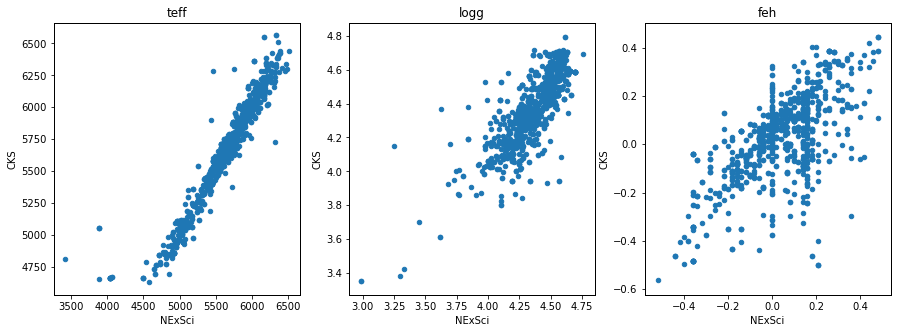

In [297]:
fig, ax = pl.subplots(1,3,figsize=(15,5))
for n,col in enumerate([['teff','cks_steff'],['logg','cks_slogg'],['feh','cks_smet']]):
    mask = df[col[0]+'_prov'].astype(str).apply(lambda x: x[:3]=='SPE' or x[:3]=='AST')
    df[mask].plot(x=col[0],y=col[1],kind='scatter',ax=ax[n])
    ax[n].set_title(col[0])
    ax[n].set_ylabel('CKS')
    ax[n].set_xlabel('NExSci')

From the cks list, only one candidate (the one we identified yesterday) has complete stellar parameters. So I used the stellar parameters from nexsci table with spectroscopy as providence.

In [265]:
d = df.loc[idx,cols].drop_duplicates('kepoi_name_y')
d.index = d['kepoi_name_y']

In [341]:
def T_eq(a, D, da=0, dD=0):
    '''
    equilibrium temperature

    a    : albedo [0,1]
    D    : semi-major axis in au
    see http://burro.case.edu/Academics/Astr221/SolarSys/equiltemp.html
    '''
    Tsol = 5770 #K
    Rsol = 6.957e8 #m
    au   = 1.4959787e11 #m
    Tp = Tsol*(1-a)**0.25*np.sqrt(Rsol/(2*D*au))

    return Tp

## KOI 367.01

In [ ]:
mu     sig_hi     sig_lo
Teff      5767.164612  96.497032  97.290139
logg         4.454554   0.042823   0.074362
feh          0.064360   0.103672   0.102238
mass         1.013759   0.044075   0.041312
radius       0.993366   0.085620   0.056729
AV           0.280244   0.190468   0.156308
distance   182.674663  15.813103  11.187156
pmass      18          12         12

In [361]:
P_days   = 31.578651
Ms_Msun  = 1.013759
mp_Mearth= 18
ecc      = 0
inc_deg  = 90

RV_K(P_days, Ms_Msun, mp_Mearth, ecc, inc_deg)

3.6522403469278224

In [363]:
Tstar = 5767
a_au = 0.195
a = 0.5

In [364]:
T_eq(a, a_au)

529.82726987419824

In [371]:
2*np.pi*0.993366*u.Rsun.to(u.m)/(11.7*u.day.to(u.second))

4295.478590610229

In [ ]:
P_rot = 11.7

vsini

In [369]:
from scipy.stats import norm

norm.rvs(loc=18,scale=1)